## 1. 필요한 패키지들을 불러옵니다.

In [1]:
import os
BASE_PATH = os.path.dirname(os.getcwd())
os.chdir(BASE_PATH)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.models import load_model

In [4]:
from utils.helper import images_cropper, glob_all_files, paths2numpy
from utils.helper import draw_rectangles

## 2. 학습 시킨 모델을 불러옵니다

In [5]:
# 모델을 불러옵니다. 
model = load_model('./models/waly_model')
model.summary()

Model: "functional_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 36, 36, 3)]       0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 36, 36, 32)        896       
_________________________________________________________________
batch_normalization_90 (Batc (None, 36, 36, 32)        128       
_________________________________________________________________
re_lu_101 (ReLU)             (None, 36, 36, 32)        0         
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 18, 18, 64)        18496     
_________________________________________________________________
batch_normalization_91 (Batc (None, 18, 18, 64)      

## 3. 평가용 데이터를 불러옵니다.

In [6]:
paths = glob_all_files('./data/test/')

assert paths, print("올바른 경로가 아니거나, 경로 내에 평가용 이미지가 존재하지 않습니다.")

imgs = paths2numpy(paths)

bucket_crop_imgs, bucket_crop_crds = images_cropper(imgs, 10, 10, 36, 36)

/home/ubuntu/CH/Find_Wally_Deploy/utils/helper.py:168: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(bucket_images), bucket_coords


## 4. 모델을 평가용 데이터로 테스트합니다.

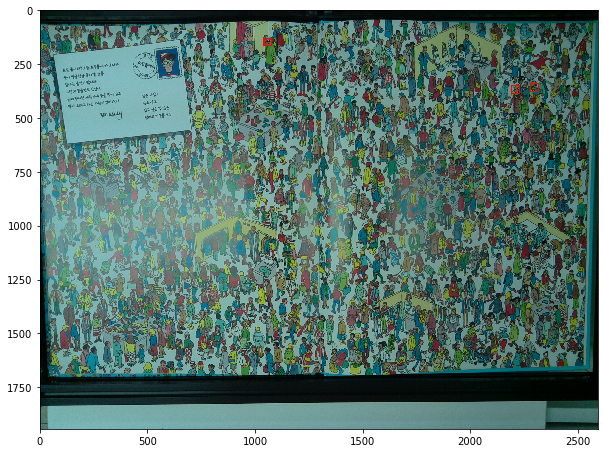

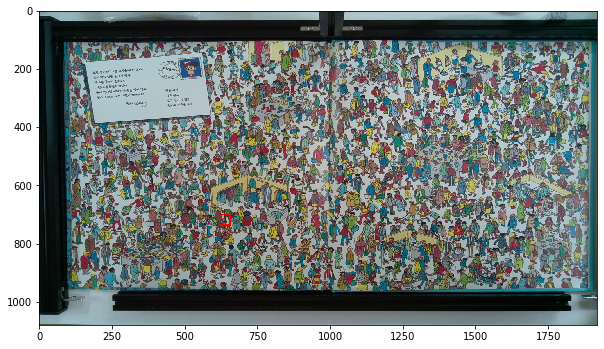

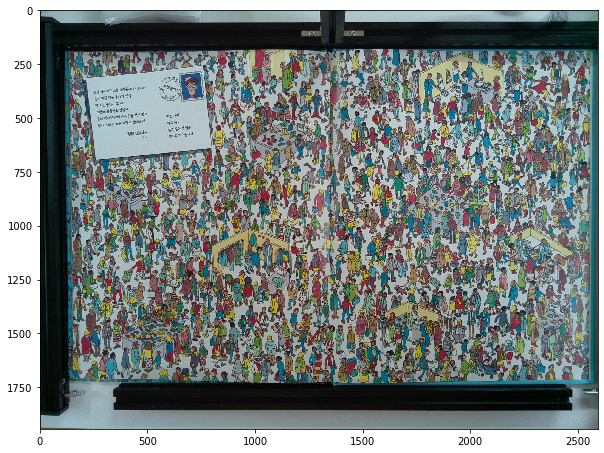

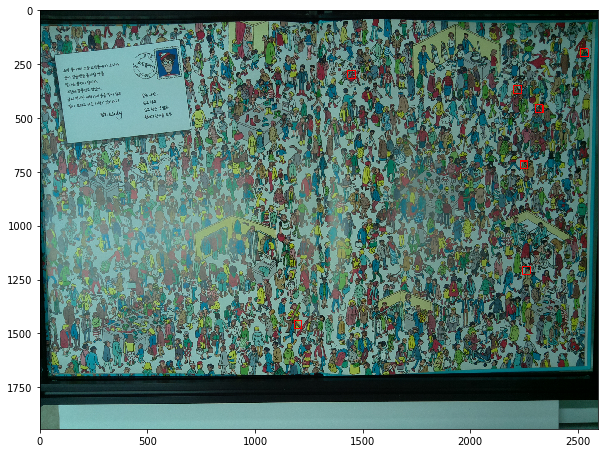

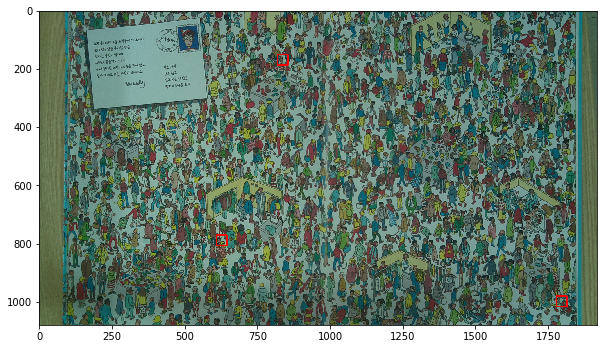

In [7]:
# 잘린 이미지중 월리가 있는 이미지를 찾고 해당이미지의 좌표를 원본 이미지에 출력합니다
for img_ind, im in enumerate(imgs):
    cropped_imgs = bucket_crop_imgs[img_ind]
    cropped_crds = bucket_crop_crds[img_ind]

    # Wally 라고 생각되는 이미지의 index을 가져옵니다.
    predicts = model.predict(cropped_imgs)
    bool_mask = (predicts > 0.5)[:, 0]

    # Wally 라고 생각되는 이미지 좌표를 가져옵니다.
    target_crds = np.array(cropped_crds)[bool_mask]

    # 전체 이미지에 월리라고 예측 되는 부분에 사각형을 그립니다.
    predicts = predicts[bool_mask]  # 불리언 마스크를 적용시켰을 때의 예측값을 저장합니다.
    result_image = draw_rectangles(im, target_crds, (255, 0, 0), 3, predicts[:, 0])

    fig = plt.figure(figsize=(10, 10))
    plt.imshow(result_image)
    plt.show()